# Contact area analysis

Lables already exists, for mesh m-3-15.msh is  [2201, 1590, 260]
t and T have been successfully extracted from /home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-15-c-1-e-14875/Result_T-s-1213-d-112-m-3-15-c-1-e-14875.csv
Lables already exists, for mesh m-3-10.msh is  [3157, 7018, 2141]
t and T have been successfully extracted from /home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-10-c-1-e-43604/Result_T-s-1213-d-112-m-3-10-c-1-e-43604.csv
Lables already exists, for mesh m-3-7.msh is  [12266, 11501, 617]
t and T have been successfully extracted from /home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-7-c-1-e-112156/Result_T-s-1213-d-112-m-3-7-c-1-e-112156.csv
Lables already exists, for mesh m-3-5.msh is  [19098, 34079, 7351]
t and T have been successfully extracted from /home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-5-c-1-e-271817/Result_T-s-1213-d-112-m-3-5-c-1-e-271817.csv
Labl

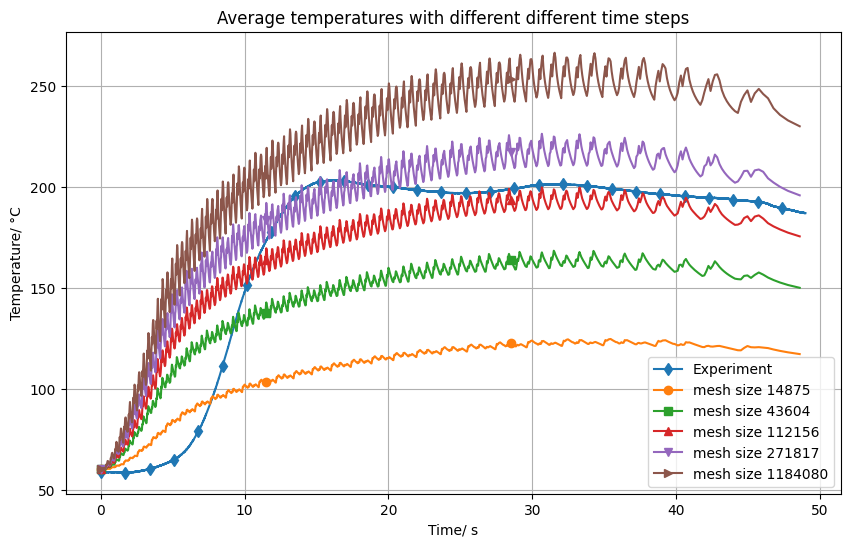

In [2]:
import os
import shutil
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('/home/yanjun/Documents/FEniCSx/Practice/Concise')

from brake_disc_functions import *

source_dir = '/home/yanjun/Documents/FEM_results/python_results/mesh_size/'
#destination_dir = '/home/yanjun/Documents/FEniCSx/Project/python_analysis/mesh_size/'

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)

#for file in csv_files:
    #shutil.copy(file, destination_dir)

type1 = 'mesh_size'
csv_files.sort(key=lambda x: extract_file_labels(x,type1))

plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Project/python_analysis/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
t_e = np.linspace (0, 49, len(T_e_ave) )
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

j = 0
marker_styles = ['o', 's', '^', 'v', '>', '<','d' ] 

for csv_file in csv_files:
    lables = find_3_coord(  extract_mesh_labels(csv_file)  )
    
    #t,T = read_t_T (os.path.basename(csv_file))
    t,T = read_t_T ( csv_file )
    T_3_ave = []
    for i in range(len(T)):
        T_3_all =  T[i][ lables[0] ] + T[i][ lables[1] ] + T[i][ lables[2] ]   
        T_3_ave.append ( T_3_all / 3 )
    plt.plot(t,T_3_ave,label= f'mesh size { extract_file_labels(csv_file, type1)  }',
             marker=marker_styles[j], markevery=500)
    j += 1

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('Average temperatures with different different time steps')
plt.legend()
plt.grid(True)
plt.savefig('T_ave_time_step.png')
plt.show()


In [6]:
print(csv_files)

['/home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-15-c-1-e-14875/Result_T-s-1213-d-112-m-3-15-c-1-e-14875.csv', '/home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-10-c-1-e-43604/Result_T-s-1213-d-112-m-3-10-c-1-e-43604.csv', '/home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-7-c-1-e-112156/Result_T-s-1213-d-112-m-3-7-c-1-e-112156.csv', '/home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-5-c-1-e-271817/Result_T-s-1213-d-112-m-3-5-c-1-e-271817.csv', '/home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-3-c-1-e-1184080/Result_T-s-1213-d-112-m-3-3-c-1-e-1184080.csv']


t and T have been successfully extracted from /home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-15-c-1-e-14875/Result_T-s-1213-d-112-m-3-15-c-1-e-14875.csv
t and T have been successfully extracted from /home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-10-c-1-e-43604/Result_T-s-1213-d-112-m-3-10-c-1-e-43604.csv
t and T have been successfully extracted from /home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-7-c-1-e-112156/Result_T-s-1213-d-112-m-3-7-c-1-e-112156.csv
t and T have been successfully extracted from /home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-5-c-1-e-271817/Result_T-s-1213-d-112-m-3-5-c-1-e-271817.csv
t and T have been successfully extracted from /home/yanjun/Documents/FEM_results/python_results/mesh_size/s-1213-d-112-m-3-3-c-1-e-1184080/Result_T-s-1213-d-112-m-3-3-c-1-e-1184080.csv


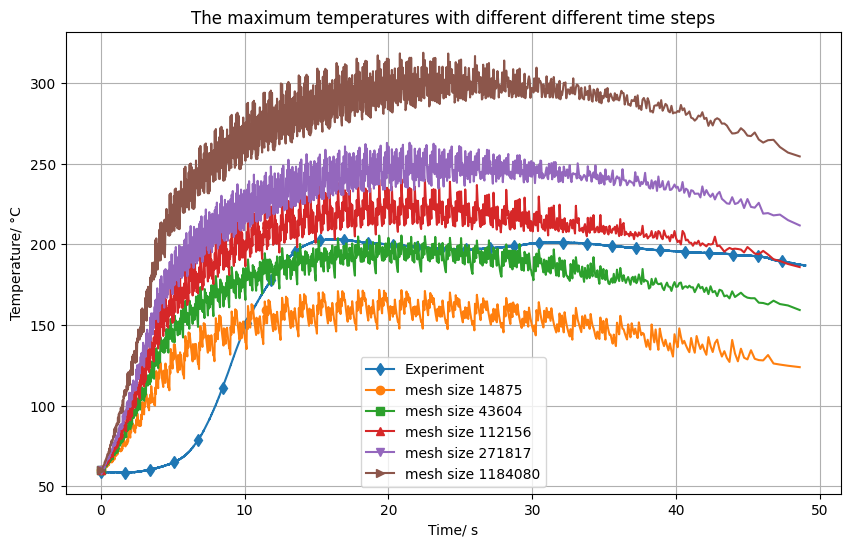

In [4]:
import os
import shutil
import pandas as pd
import re
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('/home/yanjun/Documents/FEniCSx/Practice/Concise')

from brake_disc_functions import *

source_dir = '/home/yanjun/Documents/FEM_results/python_results/mesh_size/'                

# Collect all CSV files from the destination directory
csv_files = collect_csv_files(source_dir)

type1 = 'mesh_size'
csv_files.sort(key=lambda x: extract_file_labels(x,type1))

plt.figure(figsize=(10, 6))

df1 = pd.read_csv('/home/yanjun/Documents/FEniCSx/Project/python_analysis/experiment_result.csv')
T_e_ave = ( df1.iloc[:,1] + df1.iloc[:,3] + df1.iloc[:,5] ) /3
t_e = np.linspace (0, 49, len(T_e_ave) )
plt.plot(t_e, T_e_ave, label= "Experiment",marker='d',markevery=1000)

j = 0
marker_styles = ['o', 's', '^', 'v', '>', '<', 'd' ] 

for csv_file in csv_files:

    #t,T = read_t_T (os.path.basename(csv_file), )
    t,T = read_t_T ( csv_file )

    T_max = []
    for i in range(len(T)):
        T_max.append( max(T[i]) )
    plt.plot(t,T_max, label= f'mesh size { extract_file_labels(csv_file, type1)  }', marker=marker_styles[j], markevery=500 )
    j += 1

plt.xlabel('Time/ s')
plt.ylabel('Temperature/ °C')
plt.title('The maximum temperatures with different different time steps')
plt.legend()
plt.grid(True)
plt.savefig('T_max_time_step.png')
plt.show()


In [8]:
sys.path.append('/home/yanjun/Documents/FEniCSx/Practice/Concise')

from brake_disc_functions import *

